# PHYS 297 - Homework 8
You can use these buttons below to launch this Jupyter notebook in either binder or Colab.

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys297/spring2023?urlpath=%2Ftree/Homework%208.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys297/blob/spring2023/Homework%208.ipynb)

# Introduction
In this homework we are going to fit some sample data a couple of different ways. First we will do so by manually minimizing the $\chi^2$ statistic. The second way is we will used a baked in fitting routine in scipy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

We can load the data from our experiment into our Python notebook using the numpy command `genfromtxt`, which stores the experimental data in a variable we call `data`.

The format of data is that it has 48 columns, corresponding to the 12 experiments we did, and each experiment recording 'time' (t), 'position' (x), 'velocity' (v), and 'acceleration' (a).

Using the `reshape` command we change the shape to be a 3-dimensional matrix, where the first dimension corresponds to time, the second dimension is the experiment, and the third dimension is either t, x, v, or a.

In [2]:
data_url = "https://raw.githubusercontent.com/mgrau/phys297/spring2023/phys297_cart_experiment_2023.02.15.csv"
data = np.genfromtxt(data_url, delimiter=',', skip_header=1)
data = data.reshape(-1,12,4)

Here we will plot the position (index of third dimension = 1) against time (index of third dimension = 0) of the third experiment (index of the second dimension = 2). The use of the colon ':' in the first dimension means we want to plot all the data values.

We can also make a second figure of the velocity (index of third dimension = 2) against time of the same experiment.

Text(0, 0.5, 'velocity (m/s)')

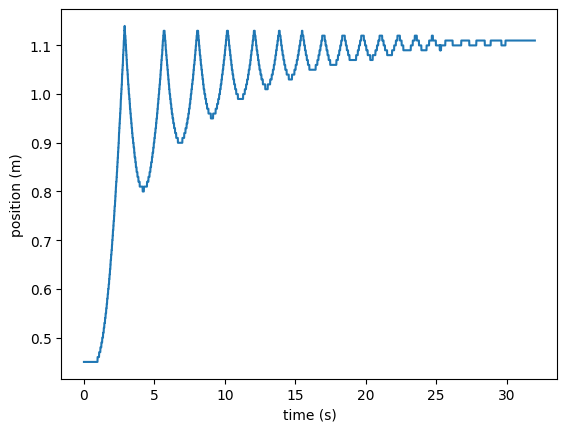

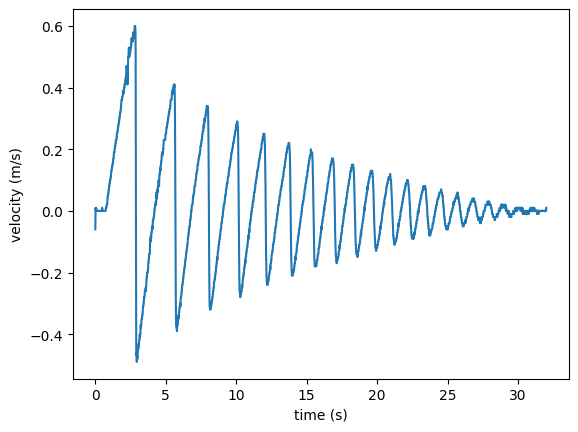

In [3]:
t = data[:,2,0]
x = data[:,2,1]
v = data[:,2,2]
plt.figure()
plt.plot(t, x)
plt.xlabel('time (s)')
plt.ylabel('position (m)')

plt.figure()
plt.plot(t, v)
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

Let's narrow in our analysis on the data occuring after the first bounce. We can use the function `find_peaks` from `scipy.signal` to find the locations of our bounces. We will save this as the variable `bounces`, which will contain the indices of each bounce. We can get the time and location of each bounce by using logical indexing (`t[bounces]` and `x[bounces]`). Let's make a new plot where we identify the position of each bounce.

[ 289  569  806 1018 1209 1386 1548 1699 1842 1977 2107 2233 2355 2472
 2527 2530 2590 2706 2814 2924]


Text(0, 0.5, 'position (m)')

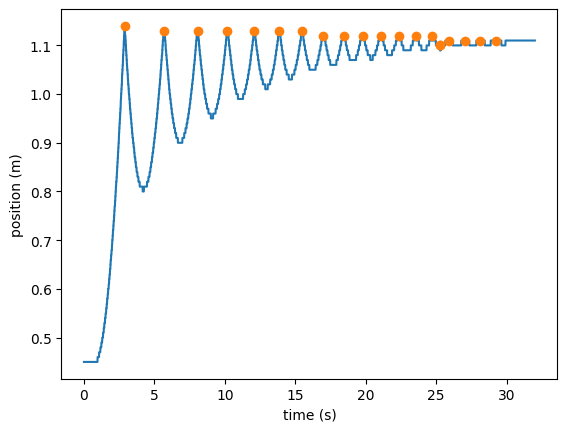

In [4]:
from scipy.signal import find_peaks
bounces = find_peaks(x)[0]
print(bounces)
plt.plot(t, x)
plt.plot(t[bounces], x[bounces], 'o')
plt.xlabel('time (s)')
plt.ylabel('position (m)')

Now we have an elegant way to hone in on the data occuring after the first bounce, and before the second. We will also throw away the points that are `edge=10` points near each bounce so we don't get any data acquired when the cart is in the process of bouncing.

Text(0.5, 1.0, 'cart position after first bounce')

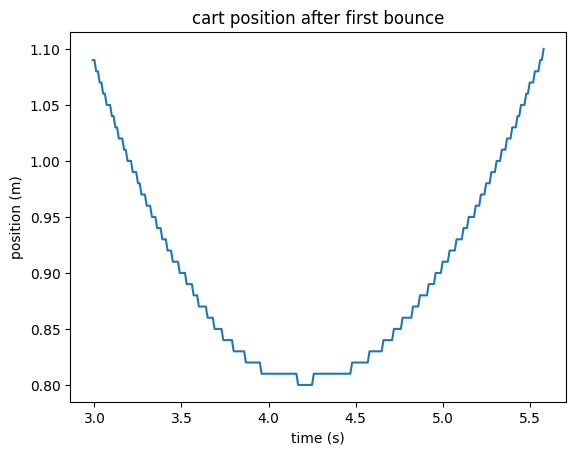

In [5]:
edge = 10
t_bounce1 = t[bounces[0]+edge:bounces[1]-edge]
x_bounce1 = x[bounces[0]+edge:bounces[1]-edge]
v_bounce1 = v[bounces[0]+edge:bounces[1]-edge]

plt.figure()
plt.plot(t_bounce1, x_bounce1)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.title('cart position after first bounce')

# Problem 1 - $\chi^2$ Fitting
1. Write a function `f(t, params)` that takes an array `t` as an input, and a list of parameters `params = [p0, p1, p2]`, and computes the following:
$$
f(x) = p_0 + p_2 \times (t - p_1)^2
$$
2. Plot the data, with errorbars, and on the same figure, plot this function. Choose a set of good guess values for `params`, called `guess`. Hint: to generate your guess, try the following:
    - For `guess[0]` try the minimum value of `x_bounce1`.
    - For `guess[1]` try the `t` value of the minimum of `x_bounce1`.
    - For `guess[2]` try a few different values until your plot starts to look close
What is are your guesses? Do they make sense?
3. Write a function `X2(params)` to calculate the value of $\chi^2$ as a function of `params`
$$
\chi^2(p) = \sum_i (x_i - f(t, p))^2
$$
4. Use `fmin` to calculate the value of `params` that minimizes $\chi^2$:
```python
fit_params = fmin(X2, guess)
```
What do you get for `fit_params`? Are they close to your guess? Are they better? What value is the value of $\chi^2$ for your guess and for the value returned from `fmin`?
5. Plot `f(t_bounce1, fit_params)` together with the data and your guess.

# Problem 2 - Nonlinear least squares fitting
To use the built in curve fitting routine in scipy, import `curve_fit` from `scipy.optimize`. The function `curve_fit` uses a slightly different form of the fitting function. Write a function `g` that is a function of 4 different parameters, `g(t, p0, p1, p2)` that calculates the same function as `f(t, p)` from the previous problem. Use this to fit the data and compare the value of your fit params. Create a plot of this fitting attempt as well.

In [ ]:
from scipy.optimize import curve_fit

def g(t, p0, p1, p2):
    return

fit_params = curve_fit(g, t_bounce1, x_bounce1, guess)